## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective:** Understand the relationship between product categories and their best-seller status.

**1. Crosstab Analysis:**

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

**2. Statistical Tests:**

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

**3. Visualizations:**

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df = pd.read_csv("/Users/admin/Desktop/IRONHACK/5.WEEK/LABS/amz_uk_price_prediction_dataset.csv")

**1. Crosstab Analysis:**

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [32]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [33]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [34]:
# Calcular la proporción de best-sellers para cada categoría
crosstab_result['proportion_best_seller'] = crosstab_result[True] /  crosstab_result.sum(axis=1)

In [35]:
#Sorted the results
sorted_categories = crosstab_result.sort_values(by='proportion_best_seller', ascending=False)

In [36]:
sorted_categories

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


`Are there categories where being a best-seller is more prevalent?`

- Grocery: This category has the highest proportion of best-sellers compared to the total number of products in the category.

**2. Statistical Tests:**

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [37]:
#chi-square: 

from scipy.stats import chi2_contingency #library for statics

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(sorted_categories) # _, porque si no retorna mas valores y solo quiero que retorne el chi-square

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [38]:
chi2_p_value < 0.5

True

Sufficient evidence to conclude there is a relationship between variables.

In [39]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [40]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab, method="cramer")

0.1222829439760564

**3. Visualizations:**

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

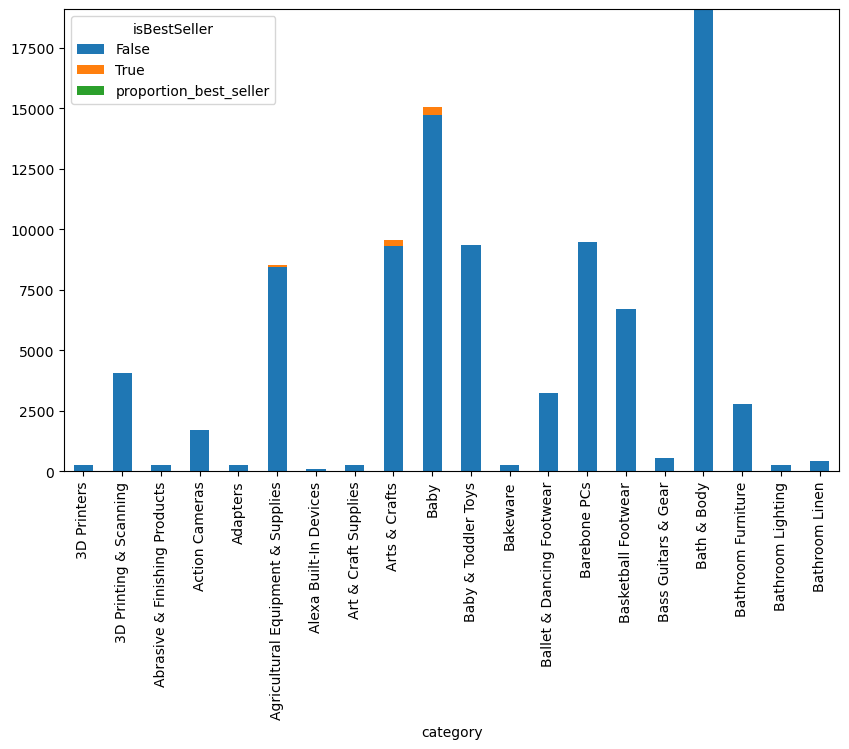

In [41]:
# Seleccionar las 5 primeras filas (categorías)
top_categories = crosstab_result.head(20)

# Trazar el gráfico de barras apiladas solo para las 5 categorías seleccionadas
top_categories.plot(kind="bar", stacked=True, figsize=(10, 6))

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective:** Investigate how different product categories influence product prices.

**0. Preliminary Step: Remove outliers in product prices.**

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

**1. Violin Plots:**

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

**2. Bar Charts:**

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

**3. Box Plots:**

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

**0. Preliminary Step: Remove outliers in product prices.**

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [42]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [43]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [44]:
# Identify the outliers
df_no_outliers = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

In [45]:
upper_bound

99.99000000000001

In [46]:
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


**1. Violin Plots:**

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

In [47]:
top_20_categories = df_no_outliers['category'].value_counts().nlargest(20).index
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

<Axes: xlabel='category', ylabel='price'>

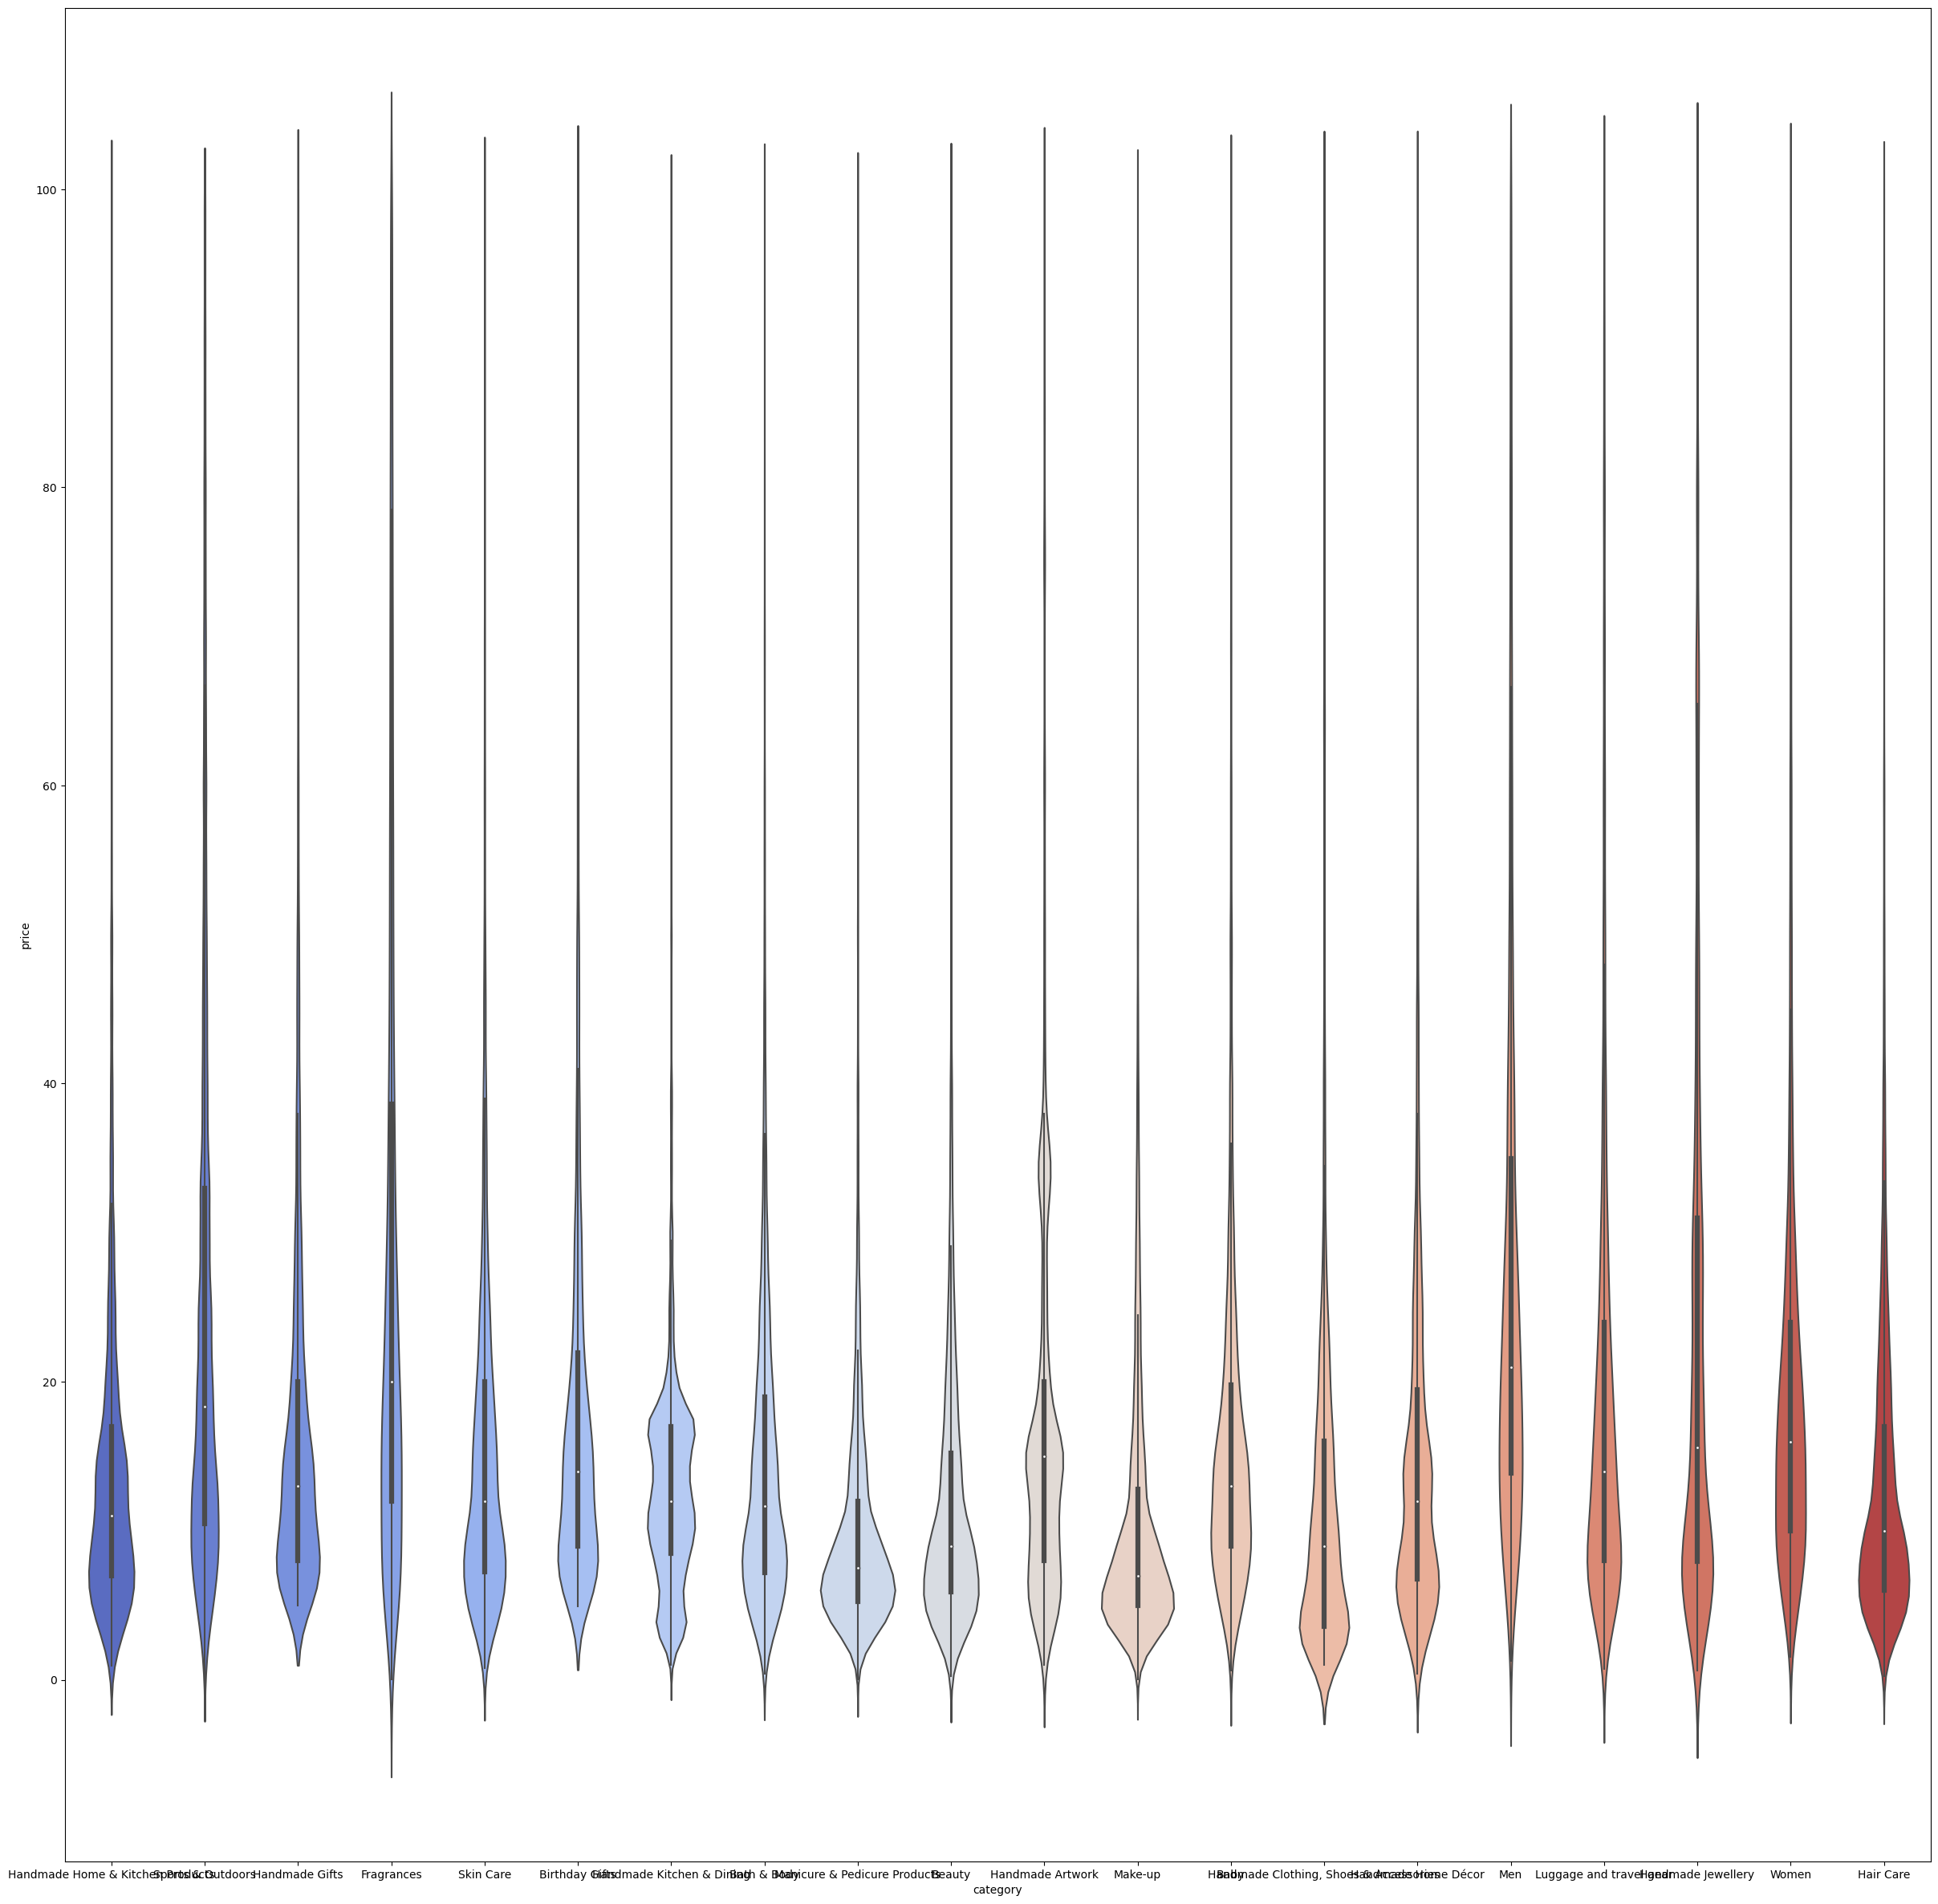

In [48]:
plt.figure(figsize=(30, 30))
sns.violinplot(data=df_filtered, x='category', y='price', palette="coolwarm")

`Which product category tends to have the highest median price? Don't filter here by top categories.`

In [49]:
#median price for each category
median_prices = df_no_outliers.groupby('category')['price'].median()

In [50]:
median_prices

category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

In [51]:
categoria_precio_mas_alto = median_prices.idxmax()
categoria_precio_mas_alto

'Desktop PCs'

In [52]:
precio_mas_alto = median_prices.max()
precio_mas_alto

74.0

In [53]:
print(f"category with high price: '{categoria_precio_mas_alto}' avg price {precio_mas_alto}")

category with high price: 'Desktop PCs' avg price 74.0


**2. Bar Charts:**

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [54]:
mean_prices = df_no_outliers.groupby('category')['price'].mean()
mean_prices

category
3D Printers                       55.739722
3D Printing & Scanning            35.623904
Abrasive & Finishing Products     14.427611
Action Cameras                    38.936875
Adapters                           8.750197
                                    ...    
Wind Instruments                  18.935339
Window Treatments                 19.870633
Women                             20.408735
Women's Sports & Outdoor Shoes    49.425894
eBook Readers & Accessories       26.006952
Name: price, Length: 296, dtype: float64

In [55]:
# Filter the top 10 categorys (based on count)
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
top_10_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [56]:
filter_avg_price = mean_prices.loc[top_10_categories]
filter_avg_price

category
Sports & Outdoors                         25.172065
Beauty                                    12.523480
Bath & Body                               14.678683
Manicure & Pedicure Products              10.231825
Handmade Clothing, Shoes & Accessories    12.958639
Make-up                                   10.612918
Skin Care                                 15.654722
Hair Care                                 13.461408
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Name: price, dtype: float64

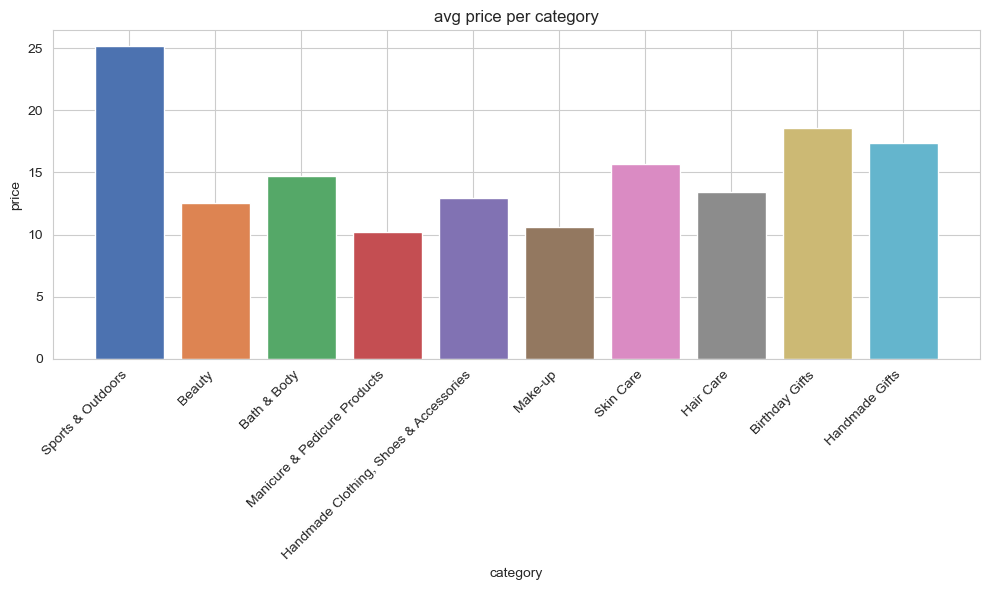

In [57]:
categories = filter_avg_price.index
avg_prices = filter_avg_price.values

# Establece el estilo y la paleta de colores
sns.set_style("whitegrid")
colors = sns.color_palette("deep")

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categories, avg_prices, color=colors)

# Añade etiquetas y título
plt.xlabel('category')
plt.ylabel('price')
plt.title('avg price per category')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.tight_layout()
plt.show()

**3. Box Plots:**

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

<Axes: xlabel='category', ylabel='stars'>

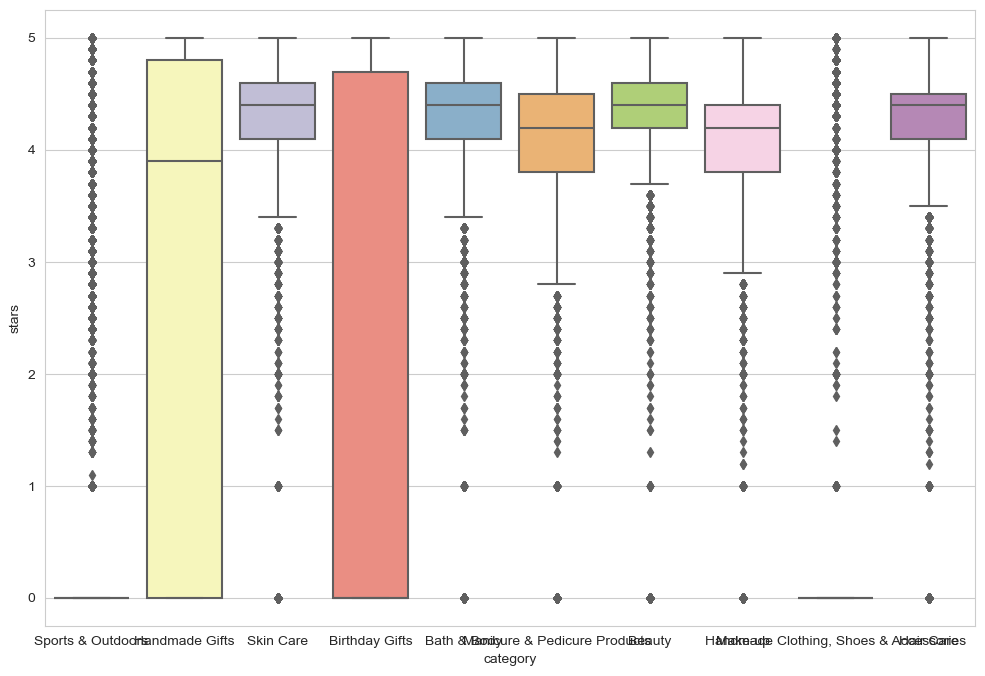

In [58]:
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Crear los diagramas de caja lado a lado
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories, palette='Set3')

## Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

**1. Correlation Coefficients:**

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

**2. Visualizations:**

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [60]:
from scipy import stats

corr, p_value = stats.pearsonr(df["price"], df["stars"])
corr, p_value

(-0.12490673262148594, 0.0)

This value indicates a weak negative correlation between the two variables.
The negative value indicates an inverse relationship: as the price of a product increases, the ratings (stars) tend to decrease, and vice versa.

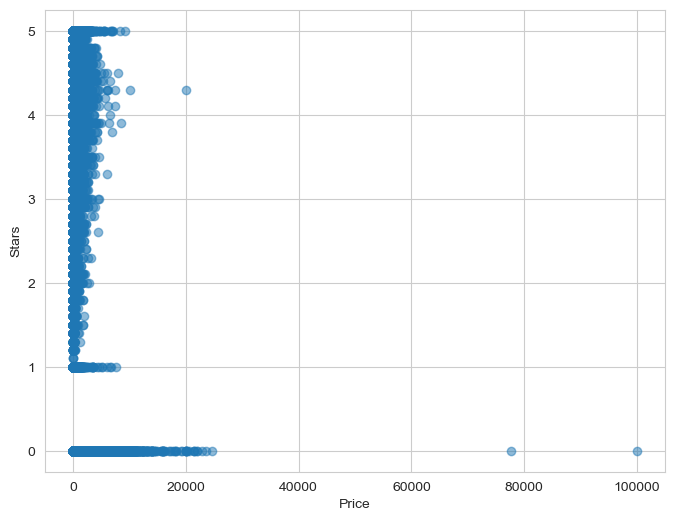

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df["price"], df["stars"], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Stars")
plt.grid(True)
plt.show()

Products with high prices tend to be rated less than products with low prices

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


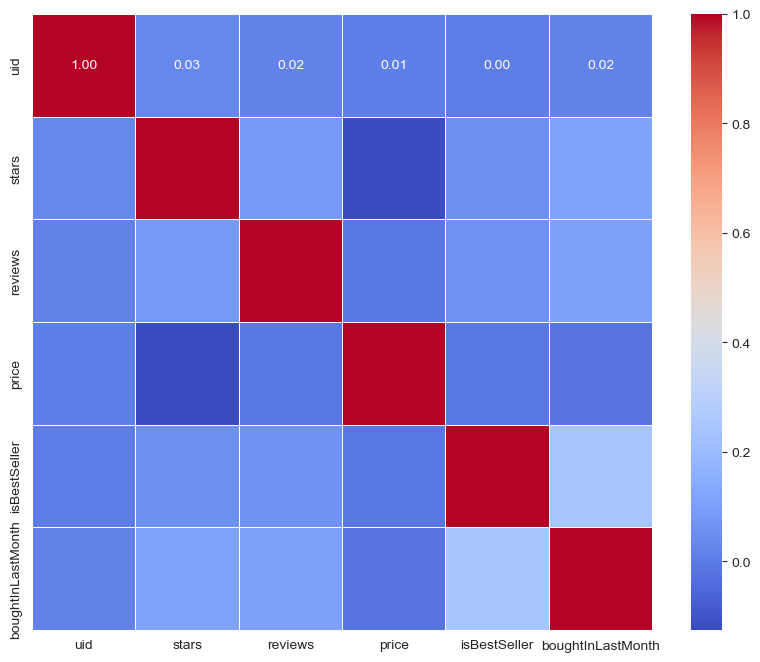

In [67]:
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Graficar el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

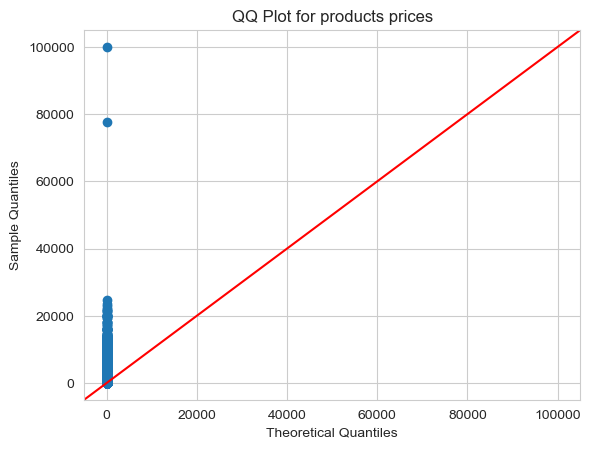

In [70]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Crear un gráfico de cuantiles-cuantiles (QQ plot) para los precios de los productos
sm.qqplot(df["price"], line ='45')
plt.title("QQ Plot for products prices")
plt.show()